In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

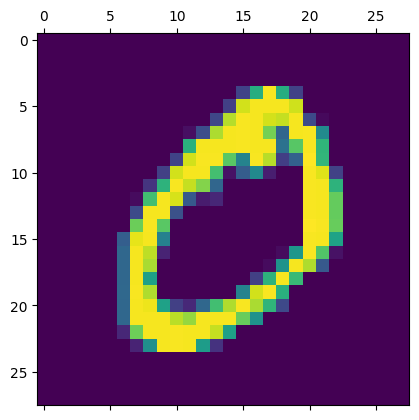

In [14]:
plt.matshow(x_train[1])

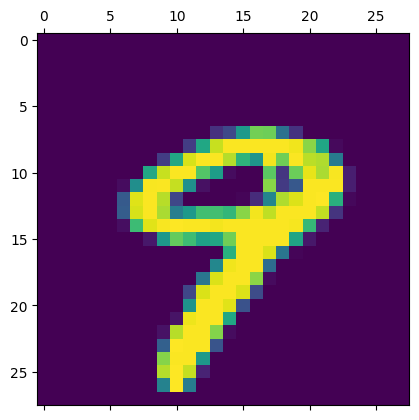

In [18]:
plt.matshow(x_test[9])

In [6]:
x_train[0].shape

(28, 28)

In [7]:
x_train.shape


(60000, 28, 28)

In [8]:
model = Sequential([
    Flatten(input_shape=(28, 28)),     # Flatten 2D image to 1D vector
    Dense(128, activation='relu'),     # Hidden layer with ReLU
    Dense(64, activation='relu'),      # Hidden layer with ReLU
    Dense(10, activation='softmax')    # Output layer (10 classes)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
x_test.shape

(10000, 28, 28)

In [11]:
model.compile(optimizer=SGD(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_test, y_test))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6045 - loss: 1.4342 - val_accuracy: 0.8924 - val_loss: 0.4025
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8902 - loss: 0.3978 - val_accuracy: 0.9122 - val_loss: 0.3076
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9105 - loss: 0.3111 - val_accuracy: 0.9216 - val_loss: 0.2741
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9221 - loss: 0.2698 - val_accuracy: 0.9284 - val_loss: 0.2439
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9299 - loss: 0.2416 - val_accuracy: 0.9344 - val_loss: 0.2239
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9354 - loss: 0.2285 - val_accuracy: 0.9388 - val_loss: 0.2100
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9391 - loss: 0.2079 - val_accuracy: 0.9431 - val_loss: 0.1949
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9448 - loss: 0.1907 - val_accuracy: 0.

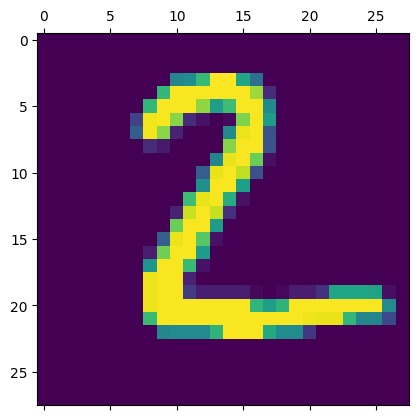

In [15]:
plt.matshow(x_test[1])

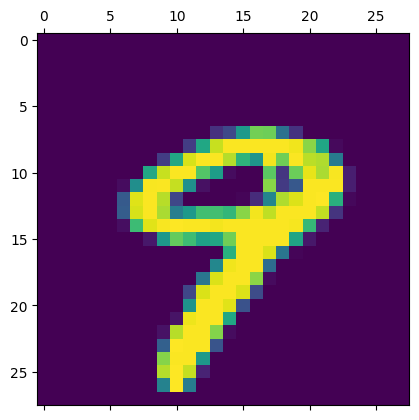

In [19]:
plt.matshow(x_test[9])

In [20]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

In [21]:
test_loss, test_accuracy

(0.16600249707698822, 0.9520000219345093)

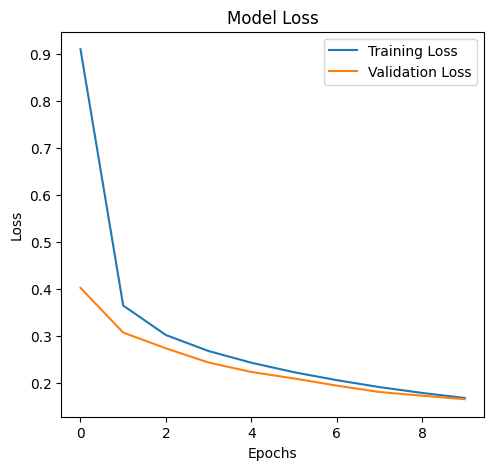

In [22]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

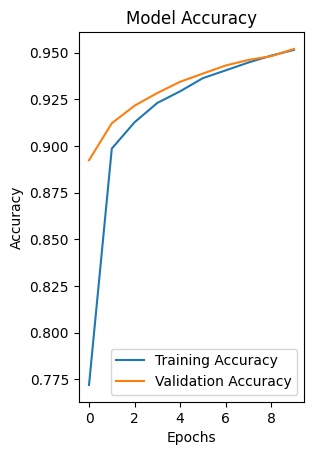

In [23]:
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()